# XG BOOST:


### En este notebook vamos a tratar un modelo Boosting

El XGboost (Extra Gradient boosting) parte del árbol de decisiones que se implementa en minería de datos para clasificar o pronosticar sobre una variable objetivo (y), a través, del aprendizaje automático que se realiza sobre un set de datos, utilizando varios clasificadores débiles que en este caso, como ya mencionamos, son nuestros árboles de decisiones, pero potenciando los resultados de estos, debido al procesamiento secuencial de la data con una función de pérdida o coste, la cual, minimiza el error iteración tras iteración, haciéndolo de esta manera, un pronosticador fuerte.

Sin embargo, como siempre esto va a depender del nivel de ajuste de los parámetros que utilicemos en la función: xgb, ya que, determinará los resultados del modelo.

Así pues, indicamos las principales ventajas de utilizar este método, en nuestros proyectos:
 - Trabaja sobre grandes bases de datos con múltiples variables, tanto categóricas como numéricas.
 - Admite missing values, o valores perdidos en medio del procesamiento del algoritmo.

No obstante, presenta las siguientes desventajas:

 - Utiliza grandes cantidades de memoria RAM, por lo que, es recomendable procesar el algoritmo determinando previamente mediante una validación cruzada, las variables que más aportan información a la estructuración del modelo.
 
 - Library Import
- Data Import
- Model Definition
- Model Training
- Confussion Matrix & Accuracy
- ROC Curve
- References


 __Importamos las librerías:__


In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing 
from sklearn.linear_model import Lasso, LassoCV
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn import datasets, metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # SVM
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb

__Importamos los datos__

In [2]:
X_train = pd.read_csv('../data/03_processed/x_train.csv')
X_train.head()

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,0,0.0,0.019016,0.005816,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.005681,0.100000,1.0,1.000000,0.000000,0.0,0.114286,1.0
1,1,0.0,0.006348,0.002303,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.021957,0.144444,0.0,1.000000,0.000000,0.0,0.028571,1.0
2,2,0.0,0.033903,0.002861,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.037994,0.100000,1.0,1.000000,0.000000,0.0,0.071429,1.0
3,3,0.0,0.005288,0.001968,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.013582,0.100000,0.0,0.537190,0.011628,0.0,0.114286,1.0
4,4,0.0,0.008973,0.001241,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.024805,0.088889,1.0,0.198347,0.011628,0.0,0.257143,1.0


In [3]:
del X_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [4]:
X_test = pd.read_csv('../data/03_processed/x_test.csv')
X_test.head()

,Unnamed: 0,num_tl_30dpd,tot_hi_cred_lim,revol_bal,purpose_debt_consolidation,home_ownership_ANY,max_bal_bc,total_cu_tl,open_rv_24m,num_tl_120dpd_2m,...,purpose_housing,mths_since_recent_revol_delinq,total_bal_ex_mort,num_sats,home_ownership_MORTGAGE,mths_since_last_record,pub_rec,delinq_amnt,num_bc_tl,mths_since_rcnt_il
0,137093,0.0,0.005378,0.004647,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.272222,0.011176,0.077778,0.0,1.0,0.0,0.0,0.100000,1.0
1,34771,0.0,0.004796,0.007528,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.450000,0.011844,0.100000,0.0,1.0,0.0,0.0,0.085714,1.0
2,71711,0.0,0.005021,0.005028,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.015285,0.133333,1.0,1.0,0.0,0.0,0.100000,1.0
3,316353,0.0,0.034286,0.009615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.122222,0.019613,0.088889,1.0,1.0,0.0,0.0,0.071429,1.0
4,71271,0.0,0.021202,0.008591,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.024168,0.166667,1.0,1.0,0.0,0.0,0.157143,1.0


In [5]:
del X_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [6]:
Y_test = pd.read_csv('../data/03_processed/y_test.csv')

In [7]:
del Y_test['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

In [8]:
Y_train = pd.read_csv('../data/03_processed/Y_train.csv')

In [9]:
del Y_train['Unnamed: 0'] # eliminamos la primera columna que se ha añadido

__Definimos y entrenamos el modelo XGBOOST.__

Los modelos Gradient Boosting están formados por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [19]:
# función del modelo
XGBOOST = xgb.XGBClassifier(random_state = 1,          # semilla inicial de aleatoriedad del algoritmo
                          n_estimators = 500,          # número de árboles 
                          booster='gbtree',            # tipo de bosster - gradient boosting
                          n_jobs = -1,                 # número de prodesadores
                          objective='binary:logistic') # indicamos que se trata de una variable binaria a predecir


# Entrenamiento del modelo con dataset TRAIN
XGBOOST.fit(X_train, Y_train)

# Predicción del modelo con data set TEST
Y_pred_boost = XGBOOST.predict(X_test)

C:\Users\Beatriz\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Matriz de Confusión:
La matriz de confusión de un problema de clase n es una matríz nxnen la que las filas se nombran según las clases reales y las columnas, según las clases previstas por el modelo. Sirve para mostrar de forma explícita cuándo una clase es confundida con otra

__Accuracy:__ Es el porcentaje total de elementos clasificados correctamente.

In [20]:
# definimos la matriz de confusión para cualquir modelo
def conf_matrix(Y_test, Y_pred): # va a comparar los resultados de las predicciones de la variable target vs la real del testset
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, without normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     69140
         1.0       0.81      0.80      0.81     23299

    accuracy                           0.90     92439
   macro avg       0.87      0.87      0.87     92439
weighted avg       0.90      0.90      0.90     92439

Wall time: 2.55 s


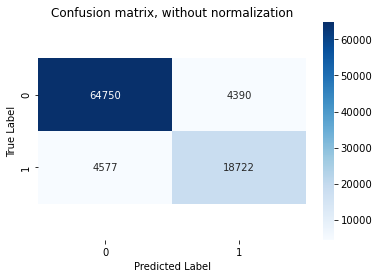

In [22]:
# calculamos la matriz de confusión del modelo:

%%time 

conf_matrix(Y_test, Y_pred_boost)                 # para la matriz de confusión usamos los datos de test
print(classification_report(Y_test,Y_pred_boost)) # comparamos los restulados de la prediccion y los dados por el dataset Y_test

### Curva ROC:

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 - Tasa de verdaderos positivos
 - Tasa de falsos positivos
 
__El AUC__ proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

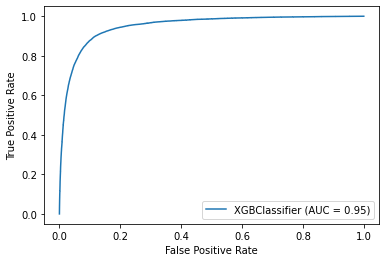

XGBOOST score train:  0.9375859324118967
XGBOOST score:  0.9029954889170155


In [14]:
metrics.plot_roc_curve(XGBOOST, X_test, Y_test)                 # CURVA ROC
plt.show() 
print("XGBOOST score train: ", XGBOOST.score(X_train, Y_train)) # score_train
print("XGBOOST score: ", XGBOOST.score(X_test, Y_test))         # score_test

__Guardamos el modelo entrenado para poder ejecutarlo más adelante con otro test__

In [15]:
# función para guardar el modelo
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [16]:
save_models('../data/04_models/xg_boost.pkl', XGBOOST ) # ruta y modelo guradado IMP .plk

### Referencias:
- https://towardsdatascience.com/xgboost-python-example-42777d01001e
- https://relopezbriega.github.io/blog/2017/06/10/boosting-en-machine-learning-con-python/
- https://medium.com/@jboscomendoza/tutorial-xgboost-en-python-53e48fc58f73
- https://empresas.blogthinkbig.com/ml-a-tu-alcance-matriz-confusion/
- https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/
- https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/